# Table of Content

[Neural Networks](#NeuralNetworks)

* [Introduction](#Introduction)

* [Biological Neurons](#BiologicalNeurons)

* [Artificial Neural Network](#ArtificialNeuralNetwork)

* [Artificial Neurons](#ArtificialNeurons)
	* [Activation Function](#ActivationFunction)
	* [Inputs Weights](#InputsWeights)
	* [Bias Parameter](#BiasParameter)

* [Layers](#Layers)

* [Neural Network Architectures](#NeuralNetworkArchitectures)

* [Neural Network Learning](#NeuralNetworkLearning)
	* [Supervised Learning](#SupervisedLearning)
	* [Unsupervised Learning](#UnsupervisedLearning)

* [Learning Algorithm](#LearningAlgorithm) 

* [Perceptrons](#Perceptrons) 
	* [Perceptron Algorithm](#PerceptronAlgorithm) 
	* [Evaluating Perceptron Algorithm](#EvaluatingPerceptronAlgorithm) 

* [Multi Layer Perceptron - Backpropagation Algorithm](#MultiLayerPerceptronBackpropagationAlgorithm) 

* [Summary](#Summary) 

# <a id="NeuralNetworks"></a>Neural Networks

## <a id="Introduction"></a>Introduction

Many tasks that involves intelligence, pattern recognition, object classifications or detection are difficult
to implement using classical software engineering approaches, despite the fact those tasks can easily be performed by animals or children. 

For example, family cat can easily recognize you, versus a stranger?
Small child can easily recognize who is dad, and who is mom.

Human brain can perform complex pattern recognition tasks without even noticing, so how brain can do that ?


## <a id="BiologicalNeurons"></a>Biological Neurons


The answer lies in internal structure of the brain, which is biological neural networks, connected to our nervous systems. Neural Network is composed of a large number of interconnected neurons (nerve cells).

One brain has approximately 10 billion neurons, each connected to about 10,000
other neurons. The cell body of the neuron is called the ***soma***, where the inputs (dendrites) and
outputs (axons) connects soma to other soma.

Each neuron receives electrochemical inputs from other neurons at their ***dendrites***. If these
electrical inputs are powerful enough to activate neuron, then the activated neuron transmits
the signal along its ***axon***, passing it along to the ***dendrites*** of other neurons. These attached neurons
may also fire, thus continuing the process of passing the message along.

Firing a neuron  is a binary operation, the neuron either
fires or it doesn’t fire. There are no different ***grades*** of firing. Neuron will fire only 
if the total signal received at the ***soma*** exceeds a given threshold.

![Image](course/assets/image/biological-neurons.png)

***Dendrite***: Receives signals from other neurons   
***Soma***: Processes the information   
***Axon***: Transmits the output of this neuron   
***Synapse***: Point of connection to other neurons   

So, is it possible to simulate neural network from nature ?

If we simulate brain structure then we should implement computation system composed of the connected nodes, 
where on each node simple computation will be executed. Such a structure can be implemented using graph structure, which consist of the set of nodes (i.e., vertices's) and a set of connections (i.e., edges) that are link together.

Each node performs a simple computation. Each connection carries a signal (i.e., the
output of the computation) from one node to another, labeled by a weight indicating the extent to
which the signal is amplified or diminished. Some connections have large, positive weights that
amplify the signal, indicating that the signal is very important when making a classification. 
Others have negative weights, diminishing the strength of the signal, thus specifying that the output of
the node is less important in the final classification. 

Initially connection weights are initialized with random values and are modified during execution of the learning algorithm.

Such a system which implements a capabilities of the biological neural networks, and it is able to perfom tasks such a pattern recognition, object classifications or detection is Artificial Neural Network.


## <a id="ArtificialNeuralNetwork"></a>Artificial Neural Network

In 1943 ***Warren S. McCulloch***, a neuroscientist, and ***Walter Pitts***, a logician, published a paper ***A logical calculus of the ideas immanent in nervous activity***. In this paper McCulloch and Pitts tried to understand how brain could produce highly complex patterns by using many basic cells that are connected together. These basic brain cells are called neurons, and McCulloch and Pitts gave a highly simplified model of a neuron in their paper. 
Proposed model is beginning of the ***Artificial Neural Networks***.


![Image](course/assets/image/McCullochPittsNeuron.png)


After this paper other authors proposed improvements on the ***Artificial Neural Network***, for example a ***Perceptron model*** inveneted by ***Rosenblatt*** at 1958 and then from 1969, ***Multilayer Perceptron (MLP)*** invented by ***Minsky*** and ***Papert***, etc.


## <a id="ArtificialNeurons"></a>Artificial Neurons

The key element of the Artificial Neural Network is Artificial Neuron which simulates Biological Neuron.

It contains a nucleus(processing unit), several dendrites(analogous to inputs), and one axon (analogous to output), 
as shown in the following figure:


![Image](course/assets/image/artificial-neuron.jpg)

As we can see in figure our Artificial Neuron has various inputs(plus bias) and each input has randomly assigned weights.
The role of neuron is to multiply inputs with weights, sumarize the result of the multiplication, and then to pass sum through activation function. The result of the Activation Function is 0 or 1, so we can say that Activation Function 'fires' a particular neuron or not.




### <a id="ActivationFunction"></a>Activation Function

The activation function is a mathematical “gate” between the input feeding the current neuron and its output going to the next neuron. It can be as simple as a step function that turns the neuron output on and off(depending on a rule or threshold), or it can be advanced function, like non-linear fucntion which can help a network to learn complex patterns.

There is a lot of activation functions, and we will cover most common. 

#### Activation Function Types 

#### Step Function

A binary step function is a threshold-based activation function. If the input value is above or below a certain threshold, the neuron is activated and sends exactly the same signal to the next layer.

The function has form:   

$
\begin{split}
\operatorname{f}(x) =
\begin{cases}
0 & \text{if }x < 0\\
1 & \text{if }x \ge 0
\end{cases}
\end{split}
$


In [3]:
import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)

plt.grid(True)
plt.plot(x, y_step, label='Step', color='r')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

The problem with a step function is that it does not allow multi-value outputs, for example, it cannot support classifying the inputs into one of several categories.


#### Linear Function

A linear activation function takes the form:   

$ f(x) = wx + b $

Linear function is better than a step function because it allows multiple outputs, not just 1 and 0.


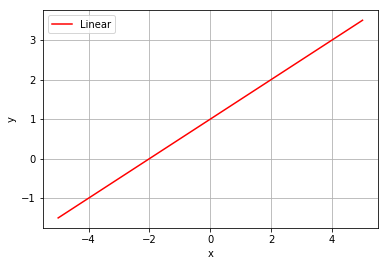

In [4]:
def linear(x):
    w = 0.5
    b = 1
    return w*x + b

x = np.linspace(-5, 5, 100)
y = linear(x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='Linear', color='r')
plt.legend()
plt.show()


Neural networks should be able to compute any function. This concept is called ***Universal approximation theorem***. In practice it was shown that if we have more then one neurons in our network, and if every neuron has linear activation functions, then the combination of these functions is again another linear activation function.

Problem is that linear functions cannot approximate any function, so we need another type of the function in order to implement ***Universal approximation theorem***, and that type of function is non-linear activation function.


#### Non-Linear Activation Functions

With non-linear activation functions we are able to model complex mapping, which is essential for learning and modeling complex data, such as images, video, audio, and data sets which are non-linear or have lot of dimensions.

So, let's se  what are the most common non-linear activaction functions:

#### Sigmoid Function

It is a function which is plotted as ***S*** shaped graph. 
Sigmoid function has following form:   

$
\ f(x) = \sigma(x) = \dfrac{1}{1 + \exp(-x)}
$



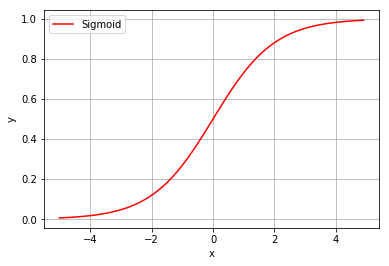

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='Sigmoid', color='r')
plt.legend()
plt.show()

The main reason why we use sigmoid function is because it exists between 0 to 1. 
Therefore, it is especially usefull for models where we have to predict the probability as an output.
Since probability of anything, exists only between the range of 0 and 1, sigmoid is the right choice for such a situations.


####  Tanh or hyperbolic tangent Function

tanh is similar to sigmoid(***S*** - shaped), but the range of the tanh function is from (-1 to 1).  
tanh function has following form:   

$
\ f(x) = \tanh(x) = \dfrac{1 - \exp(-x)}{1 + \exp(-x)}
$


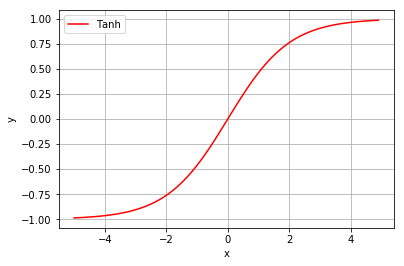

In [6]:
def tanh(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='Tanh', color='r')
plt.legend()
plt.show()




The tanh function is mainly used for classification between two classes.


####  ReLU (Rectified Linear Unit) 

ReLU is half rectified (from bottom). Function is zero when x is less than zero and is equal to x when x is above or equal to zero. ReLU activation function has following form:   

$
\begin{split}
\operatorname{f}(x) =
\begin{cases}
0 & \text{for }x < 0\\
x & \text{for }x \ge 0
\end{cases}
\end{split}
$


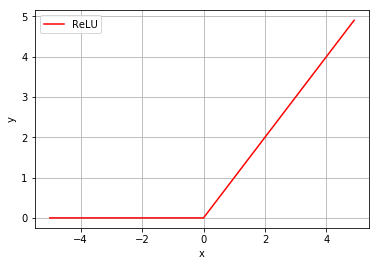

In [7]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='ReLU', color='r')

plt.legend()
plt.show()

ReLU activation function is heavily used in Convolutional Neural Networks, which are defacto a standard neural networks for computer vision problems.


So, in this paragraph, we mentioned most common activation functions, and the decision which function to use, depends of the concrete use case where we will apply our artificial neuron/network.



### <a id="InputsWeights"></a>Inputs Weights

As we already mentioned, artificial neuron has various inputs(plus bias) and each input has randomly assigned weights.
Weight represent the connections between neurons and have the capability to amplify or attenuate neuron signals.

By modifying signals, weights have the power to influence a neuron's output, therefore a neuron's activation will be dependent on the inputs and the weights. 


### <a id="BiasParameter"></a>Bias Parameter


The artificial neuron can have an independent component that adds an extra signal to the activation function. This component is called bias parameter.

Bias is an extra input to neuron which always has value 1, and has it’s own connection weight. This makes sure that even when all the inputs are none (all 0’s), neuron will be activated 'fired'.


## <a id="Layers"></a>Layers

Now we understand what neuron is, and how it works, and if we connect one neuron with another neurons, that will form neural network. Neurons will be connected on a way where output of one neuron is input to another neuron. This approach will give us huge amount of possible ways how to connect neurons or in another words, how to organize neural network. 

We can connect one layer to another and that will form neural network. 

![Image](course/assets/image/neural-network-layers.jpg)


As you can see in above figure we have 3 types of the neural layers:

* ***Input Layer***   
     is the first layer in the neural network, it takes input signals(values) and passes them on to the next layer. 
     It doesn’t apply any operations on the input signals(values) & has no weights and biases values associated.   
     
* ***Hidden Layer***   
     hidden layer is a collection of neurons stacked vertically. All the neurons in a hidden layer are connected to each and every neuron in the next layer. Last hidden layer passes on values to the output layer.   
     
* ***Output Layer***   
    is the last layer in the network and it receives input from the last hidden layer.   
    
    
    

Layers can be connected together.

If neural network is composed of several linked layers, such a network is calleed multilayer neural network. 

As we can see, neurons are organized in layers, and layers can be connected on a various ways. So, the way how neural network is defined/organized is called neural network architecture.


## <a id="NeuralNetworkArchitectures"></a>Neural Network Architectures

Architectures for neural networks are defined based on the neuron connections, and signal flow. Therefore we can split neural networks based on neuron connections and signal flow.

* ***Neuron connections***

    * ***Monolayer networks***   
        all neurons are laid out in the same level, forming one single layer

    * ***Multilayer networks***   
        neurons are divided into multiple layers, each layer corresponding to a parallel layout of neurons that shares the same input data


* ***Signal flow***

    * **Feeedforward networks**   
        the information flow is unidirectional. input signals are fed into the input layer, then, after being processed, they are forwarded to the next layer. Feedback loop does not exists.

    * ***Feedback networks***   
        signals are fed back in a neuron or layer that has already received and processed that signal.


![Image](course/assets/image/neural-network-layers.jpg)

**Figure** Multilayer Feedforward Neural Network


![Image](course/assets/image/feedback-multi-layer-neural-network.jpg)

**Figure** Multilayer Feedback Neural Network

## <a id="NeuralNetworkLearning"></a>Neural Network Learning

Until now we learned what neuron is, how it works, and how we can build neural network by connecting neurons and organizing them in a layers. But how neural network is able to learn ?

First let's discuss what learning process is. 

There are two ways how humans can learn, one way is to learn from observations without any support. Another way is to have a teacher who teach us a knowledge which we should learn.   
First aproach is called ***unsupervised*** learning and second is called ***supervised*** learnng. Same learning approachs can be aplied to Artficial Neural Networks.


### <a id="SupervisedLearning"></a>Supervised Learning

Imagine that we have training dataset which consist of the input variables (X) and an output variables (Y). Our goal is to find function which approximates inputs to the outputs, so when new input data(X) arrives, our function will be able to predict the output variable(Y).

|Input 1 |Input 2 | Output |
|--------|--------|--------|
|   150  |  50    |   0    |
|   155  |  74    |   1    |
|   160  |  85    |   1    |
|   165  |  85    |   1    |
|   170  |  60    |   0    |
|   175  |  100   |   0    |
|   180  |  78    |   0    |
|   185  |  105   |   1    |
|   190  |  120   |   1    |
|   195  |  100   |   ?    |


$$ Y = f(X) $$



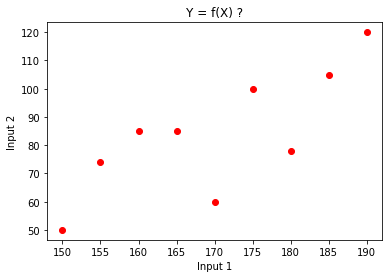

In [8]:

x = [150, 155, 160, 165, 170, 175, 180, 185, 190]
y = [50, 74, 85, 85, 60, 100, 78, 105, 120]

plt.title("Y = f(X) ?")
plt.plot(x, y, 'ro')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()



This type of learning is called ***supervised learning*** because algorithm builds an approximation function from existing dataset, so the process is similar to the process when a teacher supervising the learning process.

Since we know the correct answers(outputs), the algorithm iteratively makes predictions on the training data and approximation function is corrected during each iteration. Learning stops when the algorithm achieves an acceptable accuracy of the approximation function.

Supervised learning can be used for regression (output variable is a real value, such as “dollars” or “weight”)  and classification problems(output variable is a category, such as “spam” or “no spam”).

Note: collection of the input variables together with output variables is called ***training dataset***.

### <a id="UnsupervisedLearning"></a>Unsupervised Learning

Unsupervised learning is when we only have input data (X) and no corresponding output variables.

The goal is to model the underlying structure or distribution in the data in order to learn more about the data.

This approach is called unsupervised learning because unlike supervised learning, there is no correct answers and there is no teacher. Algorithms are left to their own to discover and present the interesting structure in the data.

Unsupervised learning is usefull for clustering (grouping customers by purchasing behavior) and association problems (discover rules that describes, such as people that buy X also tend to buy Y).
 

## <a id="LearningAlgorithm"></a>Learning Algorithm

The goal of the neural network is to approximate input variables to output variables, or in another words to find function which does needed approximation, so when new inputs is given to neural network, output can be predicted.

Imagine that we have training dataset(two inputs, one output, ten rows), we have idea how our neural networ will look like, let's say one neuron, but how we will find a function which does approximation or in another words how neural network learns ?

Earlier we said that randomly generated weights will be assigned to neuron's inputs. So, we have training dataset with two inputs, one output, ten rows and randomly generated weight values which are assigned to inputs.  

But how we can be sure that weight values which are randomly generated will exactly approximate training dataset ?

In order to solve this problem we are using learning algorithm. 

Our goal is to have input weights values which approximate training dataset, so it is obvious that if randomly generated weights are not approximating training dataset, that we need to change weights as long as we do not find weights values which will correctly approximate training dataset.

In other words, we want to find optimal weights ***W*** that drive loss function to lowest possible value and that is a goal of the learning algorithm.

General idea how learning algorithm should work is:   
 1.) define neural network   
 2.) initialize weights   
 3.) feed neural network with training dataset   
 4.) compare output of the network with expected output(error)   
 5.) if error exists, change a weights and repeat the steps 3, 4, & 5 again   

When we start with randomly generated weights, we are maikng a ***guess***.

$$ guess = input * weight $$

The neural network takes its guess and compares it to the expected output which is a ground-truth about the data, effectively asking: “Did I get this right?”

$$ error = ground truth - guess $$

The difference between the network’s guess and the ground truth is error. The calculation of the error is done by ***loss function***. A loss function quantifies how well our outputs agrees with expected outputs.
The higher level of agreement is, the loss is lower.

Goal is to minimize the loss function.

Loss function calculates the error, and if error exists, learning algorithm adjusts the weights values and repeat the process again. 

$$ error * weights contribution to error = adjustment $$

What is stil not clear is how loss function calculates the error, how amount which will be used for updating weights values will be defined and when all process will be stoped.

...


So, we can conclude that neural network is in fact corrective feedback loop, rewarding weights that support its correct guesses, and punishing weights that lead it to error.

Now let's see how one of the very first learning algorithm, the Perceptron algorithm is implemented.


## <a id="Perceptrons"></a>Perceptrons


The ***perceptron algorithm*** was introduced by ***Frank Rosenblatt*** in 1958, and refined by **Minsky** and ***Papert*** (1969).

Perceptron algortihm is a neural network with one neuron which has one layer, therefore it is called Single Layer Perceptron.

A Perceptron is a feed-forward network based on a threshold activation function and can only classify(binary classifier) linearly separable cases where output is a binary target (1, 0).

![Image](course/assets/image/artificial-neuron.jpg)


### <a id="PerceptronAlgorithm"></a>Perceptron Algorithm

Initial weights are assigned randomly. The algortihm sums all the weighted inputs and if the sum is above the threshold (some predetermined value, $\theta $), neuron is said to be activated (output=1). 

$
\ w_1x_1 + w_2x_2 + ... + w_nx_n = $$\sum_{i=1}^n w_ix_i > \theta \ -> \ Output = 1
$

$
\ w_1x_1 + w_2x_2 + ... + w_nx_n = $$\sum_{i=1}^n w_ix_i \geq \theta \ -> \ Output = 0
$


The input values are feeded in perceptron, and if the calculated output is the same as the expected output, then the performance is considered satisfactory and no changes to the weights are made.  

However, if the output does not match the desired output, then the weights will be updated in order to reduce the error. 

Update of the weights are defined with ***delta rule***:

$
\ \Delta w = \eta \ x \ d \ x \ X
$
   
$
\eta \ -> \ learning \ rate
$

$
d \ -> \ calculated \ output \ - \ expected \ output
$

$
X \ -> \ input \ data
$

This is called delta rule, 
Delta rule is a gradient descent learning rule for updating the weights of the inputs perceptron's neuron. It is a special case of the more general backpropagation algorithm which will be presented later.


Now, once we understand Perceptron algorithm, let's implement the Perceptron in Python:

In [9]:
import numpy as np

class Perceptron:
    
    def __init__(self, number_of_inputs, learning_rate=0.1):
        
        # makes the random numbers predictable
        np.random.seed(7)
        # initialize the weight matrix
        self.W = np.random.randn(number_of_inputs + 1) / np.sqrt(number_of_inputs)
        # store learning rate
        self.learning_rate = learning_rate
        
    # activation function    
    def step(self, x):
        return 1 if x > 0 else 0
        
    def fit(self, X, y, epochs=10 ):
        
        # extend inputs with bias(column of 1's)
        X = np.c_[X, np.ones(X.shape[0])]
        
        # start training
        for epoch in np.arange(0, epochs):
            
            # loop over each input data
            for (x, target) in zip(X, y):
                
                # calculate prediction:
                # take dot product of the inputs and the weights and than
                # pass sum of the dot product through the step function 
                prediction = self.step(np.dot(x, self.W))
                
                # update weights, if prediction is not same as expected target value
                if prediction != target:
                    # calculate error which is difference between calculated(prediction) and
                    # expected values(target)
                    error = prediction - target
                    
                    # update the weight matrix with delta rule
                    self.W += -self.learning_rate * error * x
                    
    def predict(self, X):
        
        # extend inputs with bias(column of 1's)
        X = np.c_[X, np.ones((X.shape[0]))]

        # take dot product of the inputs and the weights and than
        # pass sum of the dot product through the step function 
        return self.step(np.dot(X, self.W))
        


As you can see, following functionality has been implemented:

* ***init function***  
    randomly initializes weights, and keeps basic hyperparameters like ***learning_rate***
    
* ***step function***  
    implements simple step based activation function   
    
* ***fit function***  
    is a place where training is done, method loops over the defined number of epochs, calculates sum between weights and input values, applies step function on that sum, and updates the weights using delta rule
    
* ***predict function***   
    calculates the output based on inputs and trained weights

Now our algorithm is ready for evaluation.


### <a id="EvaluatingPerceptronAlgorithm"></a>Evaluating Perceptron Algorithm

Let's test Perceptron against AND function:

In [10]:
# define AND dataset, X for input data, y for output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
       
# instantiate perceptron object
p = Perceptron(X.shape[1], learning_rate=0.1)

# train the perceptron
p.fit(X, y, epochs=20)

# loop over input data
for (x, expected_output) in zip(X, y):
    
    # predict
    pred = p.predict(np.atleast_2d(x))
    # print the results
    print("[INFO] input-data={}, expected-value={}, predicted-value={}".format(x, expected_output[0], pred))


[INFO] input-data=[0 0], expected-value=0, predicted-value=0
[INFO] input-data=[0 1], expected-value=0, predicted-value=0
[INFO] input-data=[1 0], expected-value=0, predicted-value=0
[INFO] input-data=[1 1], expected-value=1, predicted-value=1


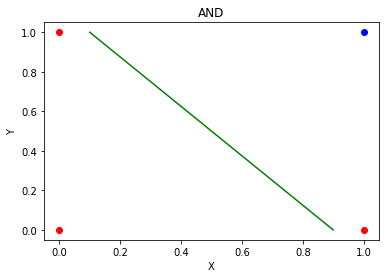

In [11]:
plt.title("AND")
plt.plot([0, 0, 1], [0, 1, 0], 'ro', )
plt.plot([1], [1], 'bo', )
plt.plot([0.1, 0.9], [1, 0], label='Linear', color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We can see that Perceptron is successfully trained to predict AND function. Also we can draw a single line (green) between two classes. Now let's try with OR function:

In [12]:
# define OR dataset, X for input data, y for output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# instantiate perceptron object
p = Perceptron(X.shape[1], learning_rate=0.1)

# train the perceptron
p.fit(X, y, epochs=20)

# loop over input data
for (x, expected_output) in zip(X, y):
    
    # predict
    pred = p.predict(np.atleast_2d(x))    
    # print the results
    print("[INFO] input-data={}, expected-value={}, predicted-value={}".format(x, expected_output[0], pred))

[INFO] input-data=[0 0], expected-value=0, predicted-value=0
[INFO] input-data=[0 1], expected-value=1, predicted-value=1
[INFO] input-data=[1 0], expected-value=1, predicted-value=1
[INFO] input-data=[1 1], expected-value=1, predicted-value=1


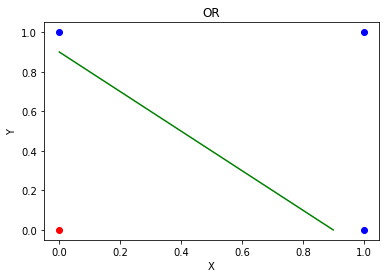

In [13]:
plt.title("OR")
plt.plot([0, 1, 1], [1, 1, 0], 'bo', )
plt.plot([0], [0], 'ro', )
plt.plot([0, 0.9], [0.9, 0],  label='Linear', color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Perceptron is successfully trained to predict OR function as well. Again we can draw single line(green) which seprates two classes. Now let's try with XOR function:

In [14]:
# define XOR dataset, X for input data, y for output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# instantiate perceptron object
p = Perceptron(X.shape[1], learning_rate=0.1)

# train the perceptron
p.fit(X, y, epochs=20000)

# loop over input data
for (x, expected_output) in zip(X, y):

    # predict
    pred = p.predict(np.atleast_2d(x))
    # print the results
    print("[INFO] input-data={}, expected-value={}, predicted-value={}".format(x, expected_output[0], pred))

[INFO] input-data=[0 0], expected-value=0, predicted-value=1
[INFO] input-data=[0 1], expected-value=1, predicted-value=0
[INFO] input-data=[1 0], expected-value=1, predicted-value=0
[INFO] input-data=[1 1], expected-value=0, predicted-value=0


Here we can see that Perceptron is not able be trained to predict XOR gate. 
We can play with different learning rates or different
weight initialization schemes or with different number of epochs, but Perceptron will never be able to correctly model the 
XOR function.

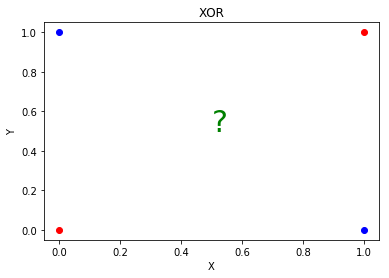

In [15]:
plt.title("XOR")
plt.plot([0, 1], [1, 0], 'bo', )
plt.plot([0, 1], [0, 1], 'ro', )
plt.annotate("?", xy=(0.5, 0.5), fontsize=30, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



So, why we can't solve XOR function using Perceptron algorithm ?

XOR function is non linear problem, which can't be solved with single Perceptron, therefore in order to solve non linear problems we will need neural network with more than one layer and with nonlinear activation functions.

So, let's introduce Multi Layer Perceptrons with backpropagation algorithm.


## <a id="MultiLayerPerceptronBackpropagationAlgorithm"></a>Multi Layer Perceptron - Backpropagation Algorithm

A Multi Layer Perceptron (MLP) has the same structure of a Single Layer Perceptron with one or more hidden layers. 

The learning algorithm is called, the backpropagation, and it consists of two phases: 

* forward phase 
    where the activations are propagated from the input to the output layer
    
* backward phase
    where the error between calculated and expected values in the output layer is propagated backwards in order to modify the weights and bias values 	
    
 		
Forward propagation:		
Propagate inputs by adding all the weighted inputs and then computing outputs using sigmoid threshold.

Summation:

$
\ w_1x_1 + w_2x_2 + ... + w_nx_n = $$\sum_{i=1}^n w_ix_i 
$

Transformations:

$
\ f(x) = \sigma(x) = \dfrac{1}{1 + \exp(-x)}
$


Backward propagation:		
Propagates the errors backward by apportioning them to each unit according to the amount of this error the unit is responsible for.


Algorithm has form:

Error in output neuron:

$
\ d_o =  y \ x (1 - y) \ x (t - y)
$

Error in hidden neuron:

$
\ d_i =  y_i \ x (1 - y_i) \ x (w_i \ x d_o)
$


Change the weights:

$
\ \Delta w = \eta \ x \ d \ x \ X
$

$
y \ -> \ calculated \ error
$

$
t \ -> \ expected \ error
$

$
\eta \ -> \ learning \ rate
$

$
d \ -> \ calculated \ output \ - \ expected \ output
$

$
X \ -> \ input \ data
$

The details about backprop is out of the scope for this tutorial, but if you want to learn detailed description, please check 
[A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/), and [Neural Network Visualization](http://www.emergentmind.com/neural-network).

Now let's implement simple Multi Layer Neural Network.



In [20]:
import numpy as np

class NeuralNetwork:
    
    def __init__(self, layers, learning_rate=0.1):
        
        self.W = []
        self.layers = layers
        self.learning_rate = learning_rate
        self.history_loss = []

        # initialize weights
        for i in np.arange(0, len(layers) - 2):
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))

        # initialize last two layers 
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))

    # sigmoid activation function
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    # derivate of the sigmoid function
    def sigmoid_derivate(self, x):
        return x * (1 - x)


    def fit(self, X, y, epochs=1000, displayUpdate=10):
        
        # extend inputs with bias(column of 1's)
        X = np.c_[X, np.ones((X.shape[0]))]

        # start training
        for epoch in np.arange(0, epochs):
            
            # loop over input dataset 
            for (x, target) in zip(X, y):
                self.partial_fit(x, target)

            # calculate loss
            loss = self.calculate_loss(X, y)
            # append loss to history dictionary
            self.history_loss.append(loss)
                
            # display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
                

    def partial_fit(self, x, y):
        # list of output activations for each layer
        activations = [np.atleast_2d(x)]

        # feedforward phase:
        for layer in np.arange(0, len(self.W)):
            
            # calculate net input            
            netInput = activations[layer].dot(self.W[layer])

            # calculate net output
            netOutput = self.sigmoid(netInput)

            # add net output t list of the activations
            activations.append(netOutput)

        # backprop phase
        # calculate error        
        error = activations[-1] - y

        # calculate the deltas
        deltas = [error * self.sigmoid_derivate(activations[-1])]

        # chain rule
        for layer in np.arange(len(activations) - 2, 0, -1):

            delta = deltas[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_derivate(activations[layer])
            deltas.append(delta)

        # reverse the deltas
        deltas = deltas[::-1]

        # weight update phase
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.learning_rate * activations[layer].T.dot(deltas[layer])


    def predict(self, X, addBias=True):
        
        prediction = np.atleast_2d(X)

        if addBias:
            # extend inputs with bias(column of 1's)
            prediction = np.c_[prediction, np.ones((prediction.shape[0]))]

        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            prediction = self.sigmoid(np.dot(prediction, self.W[layer]))

        # return the predicted value
        return prediction

    def calculate_loss(self, X, targets):

        targets = np.atleast_2d(targets)
        
        # first make prediction
        predictions = self.predict(X, addBias=False)
        
        # calculate the loss function
        loss = 0.5 * np.sum((predictions - targets) ** 2)

        # return the loss
        return loss

Please note that our Neural Network class adds bias to the inputs and hidden layers automaticaly, so if we define neural network 
3 layers, where input and hidden layers have 2 neurons, and output layer has 1 neuron, the network will have 3 neurons(2 plus bias) in input and hidden layers. 

Now let's test our neural network against XOR function which Perceptron algorithm was not able to solve.


[INFO] epoch=1, loss=0.5973971
[INFO] epoch=10, loss=0.5231000
[INFO] epoch=20, loss=0.5041256
[INFO] epoch=30, loss=0.5007969
[INFO] epoch=40, loss=0.4999642
[INFO] epoch=50, loss=0.4995194
[INFO] epoch=60, loss=0.4991444
[INFO] epoch=70, loss=0.4987875
[INFO] epoch=80, loss=0.4984363
[INFO] epoch=90, loss=0.4980848
[INFO] epoch=100, loss=0.4977278
[INFO] epoch=110, loss=0.4973601
[INFO] epoch=120, loss=0.4969759
[INFO] epoch=130, loss=0.4965692
[INFO] epoch=140, loss=0.4961331
[INFO] epoch=150, loss=0.4956604
[INFO] epoch=160, loss=0.4951427
[INFO] epoch=170, loss=0.4945711
[INFO] epoch=180, loss=0.4939356
[INFO] epoch=190, loss=0.4932254
[INFO] epoch=200, loss=0.4924289
[INFO] epoch=210, loss=0.4915340
[INFO] epoch=220, loss=0.4905278
[INFO] epoch=230, loss=0.4893976
[INFO] epoch=240, loss=0.4881310
[INFO] epoch=250, loss=0.4867161
[INFO] epoch=260, loss=0.4851421
[INFO] epoch=270, loss=0.4833996
[INFO] epoch=280, loss=0.4814809
[INFO] epoch=290, loss=0.4793800
[INFO] epoch=300, los

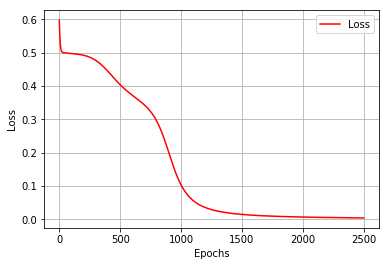

prediction:
[INFO] data=[0 0], expected=[0], prediction=[[0.04126751]], step=0
[INFO] data=[0 1], expected=[1], prediction=[[0.95666736]], step=1
[INFO] data=[1 0], expected=[1], prediction=[[0.95425982]], step=1
[INFO] data=[1 1], expected=[0], prediction=[[0.05877125]], step=0


In [21]:
# prepare XOR training dataset

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# create neural network
multi_layer_network = NeuralNetwork([2, 2, 1], learning_rate=0.5)
# fit the network
multi_layer_network.fit(X, y, epochs=2500)

# plot the loss
history_epochs = np.linspace(0, len(multi_layer_network.history_loss), len(multi_layer_network.history_loss))

plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_epochs, multi_layer_network.history_loss, label='Loss', color='r')
plt.legend()
plt.show()


# predict
print("prediction:")
for i in range(0, 4):
    x = X[i]
    prediction = multi_layer_network.predict(x)
    step = 1 if prediction > 0.5 else 0
    print("[INFO] data={}, expected={}, prediction={}, step={}".format(x, y[i], prediction, step))
        

We can see that our neural network with 3 layers is able to solve XOR function.

Now if we squeeze neural network to single layer and run training against XOR function.

In [18]:
# here we can see that if we define single layer network that network will not be able to predict XOR function
single_layer_network = NeuralNetwork([2, 1], learning_rate=0.5)
single_layer_network.fit(X, y, epochs=2500)

# predict
print("prediction:")
for i in range(0, 4):
    x = X[i]
    prediction = single_layer_network.predict(x)
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, expected={}, prediction={}, step={}".format(x, y[i], prediction, step))


[INFO] epoch=1, loss=0.5334451
[INFO] epoch=10, loss=0.5231619
[INFO] epoch=20, loss=0.5151874
[INFO] epoch=30, loss=0.5097935
[INFO] epoch=40, loss=0.5063501
[INFO] epoch=50, loss=0.5042355
[INFO] epoch=60, loss=0.5029587
[INFO] epoch=70, loss=0.5021880
[INFO] epoch=80, loss=0.5017172
[INFO] epoch=90, loss=0.5014238
[INFO] epoch=100, loss=0.5012362
[INFO] epoch=110, loss=0.5011128
[INFO] epoch=120, loss=0.5010292
[INFO] epoch=130, loss=0.5009708
[INFO] epoch=140, loss=0.5009291
[INFO] epoch=150, loss=0.5008985
[INFO] epoch=160, loss=0.5008757
[INFO] epoch=170, loss=0.5008584
[INFO] epoch=180, loss=0.5008450
[INFO] epoch=190, loss=0.5008347
[INFO] epoch=200, loss=0.5008266
[INFO] epoch=210, loss=0.5008202
[INFO] epoch=220, loss=0.5008151
[INFO] epoch=230, loss=0.5008111
[INFO] epoch=240, loss=0.5008078
[INFO] epoch=250, loss=0.5008052
[INFO] epoch=260, loss=0.5008031
[INFO] epoch=270, loss=0.5008014
[INFO] epoch=280, loss=0.5008000
[INFO] epoch=290, loss=0.5007989
[INFO] epoch=300, los

Again we see that single layer network is not able to solve XOR function.

Anather example is a famous MNIST dataset which is used for recognition of the handwritten digits.
scikit-learn library provide subset of the MNIST dataset. The subset has 1,797 handwritten digits, each image is grayscale image with size 8x8(original MNIST dataset has 60000 grayscale images where each image has size 28x28). 

So, let's implement following neural network:
* input layer, 64 neurons(remember image has size 8x8)
* hidden layer, 32 neurons
* hidden layer, 20 neurons
* output layer, 10 neurons(since we have 10 digits)

and see, can our neural network recognize handwritten digits ?


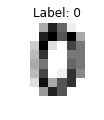

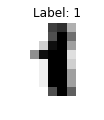

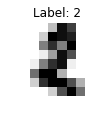

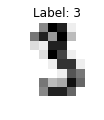

[INFO] dataset shape(samples, dimension): (1797, 64)
[INFO] last record before scaling ...
[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
 15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
 15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
  8.  0.  0.  1.  8. 12. 14. 12.  1.  0.]
[INFO] last record after scaling ...
[0.     0.     0.625  0.875  0.5    0.0625 0.     0.     0.     0.125
 1.     0.875  0.375  0.0625 0.     0.     0.     0.     0.9375 0.9375
 0.5    0.9375 0.     0.     0.     0.     0.3125 1.     1.     0.625
 0.     0.     0.     0.     0.75   0.9375 0.9375 0.75   0.     0.
 0.     0.25   1.     0.375  0.25   1.     0.375  0.     0.     0.5
 1.     0.625  0.5    1.     0.5    0.     0.     0.0625 0.5    0.75
 0.875  0.75   0.0625 0.    ]
[INFO] last train output record ...
[0 1 0 0 0 0 0 0 0 0]
[INFO] build the neural network ...
[INFO] epoch=1, loss=605.9887737
[INFO] epoch=10, loss=289.6761860
[INFO

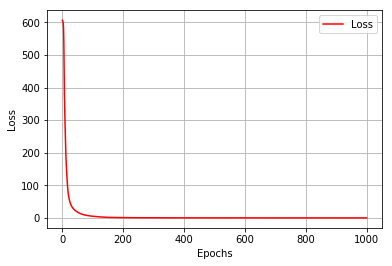

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        41
          1       0.90      0.98      0.94        55
          2       1.00      1.00      1.00        46
          3       1.00      0.95      0.97        39
          4       0.98      0.93      0.95        44
          5       0.93      0.95      0.94        44
          6       0.98      0.98      0.98        44
          7       0.96      0.94      0.95        49
          8       0.92      0.94      0.93        49
          9       0.89      0.87      0.88        39

avg / total       0.95      0.95      0.95       450



In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
import matplotlib.pylab as plt

# load data set 
dataset = datasets.load_digits()

# draw first 4 images
images_and_labels = list(zip(dataset.images, dataset.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    plt.show()
    
# check the shape of the data field from dataset, expected shape is(1797, 64)
print("[INFO] dataset shape(samples, dimension): {}".format(dataset.data.shape))

# print last record before scaling
print("[INFO] last record before scaling ...")
print(dataset.data[-1])

# scale the data in range 0,1
data = dataset.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())

# print last record after scaling
print("[INFO] last record after scaling ...")
print(data[-1])

# split the data into train and test datasets, X is related to inputs, Y to outputs
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

print("[INFO] last train output record ...")
print(trainY[-1])


print("[INFO] build the neural network ...")
nn = NeuralNetwork([trainX.shape[1], 32, 20, 10])

# train the network
nn.fit(trainX, trainY, epochs=1000)

# plot the loss
history_epochs = np.linspace(0, len(nn.history_loss), len(nn.history_loss))

plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_epochs, nn.history_loss, label='Loss', color='r')
plt.legend()
plt.show()

print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))


Classification report shows that our neural network reached almost 97% of accuracy, which is great result, even digits 1, 2, 3, 8 have accuracy lower then 97%(92%, 96%, 94%, 95%). 


## <a id="Summary"></a>Summary

We showed how to implement very simple artificial neural network, we started with Single Layer Percpetron, then we showed that Perceptron has limitations, which are solved with Multi Layer Perceptrons. What is interesting is that for implementation we only used Python, numpy library and basic principles from Linear algebra.

In practice various neural network architecures with a lot of layers can be defined, where various activation functions can be used, different loss function optimizer can be used, different weights initializations strategies can be applied, so it will be hard to implement all possibilies, therefore it is much easier to use libraries such as [***Keras***](https://keras.io/), or [***Tensorflow***](https://www.tensorflow.org/) that already implemented all what is needed for Nueral Networks, so that the developer can focus on problems which can be solved with neural networks not on implementation as such.
